In [1]:
import bagpy
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def process_bag(bag_file, core_count):
    b = bagpy.bagreader(bag_file)

    map_csv = b.message_by_topic('map')
    map_df = pd.read_csv(map_csv)
    
    map_df_time = map_df['Time'].values
    map_df = map_df[:10].copy()
    print(map_df.shape)
    
    width, height = map_df.iloc[0]['info.width'], map_df.iloc[0]['info.height']
    print("width", width, "height", height)
    
    initial_time = map_df.iloc[0]['Time']
    map_df['Time'] = map_df['Time'] - initial_time
    
    duration = map_df_time[1:11] - map_df_time[:10]
    
    duration = np.resize(duration, (duration.shape[0], 1))
    duration = np.insert(duration, 0, core_count, axis=1)
    return duration

In [3]:
# data = np.vstack(duration)
bag_files = [
    ("map_merge_turtlebot_house_1core_2023-03-23-18-31-03.bag", 1),
    ("map_merge_turtlebot_house_2core_2023-03-23-19-20-01.bag", 2),
    ("map_merge_turtlebot_house_3core_2023-03-23-19-22-26.bag", 3),
    ("map_merge_turtlebot_house_4core_2023-03-23-19-27-56.bag", 4),
    ("map_merge_turtlebot_house_5core_2023-03-23-19-29-51.bag", 5),
    ("map_merge_turtlebot_house_6core_2023-03-23-19-32-01.bag", 6),
    ("map_merge_turtlebot_house_7core_2023-03-23-19-33-13.bag", 7),
    ("map_merge_turtlebot_house_8core_2023-03-23-19-34-26.bag", 8)
]

durations = [process_bag("../bags/" + f, c) for f, c in bag_files]

[INFO]  Data folder ../bags/map_merge_turtlebot_house_1core_2023-03-23-18-31-03 already exists. Not creating.
(10, 472434)
width 737 height 641
[INFO]  Data folder ../bags/map_merge_turtlebot_house_2core_2023-03-23-19-20-01 already exists. Not creating.
(10, 472434)
width 737 height 641
[INFO]  Successfully created the data folder ../bags/map_merge_turtlebot_house_3core_2023-03-23-19-22-26.
(10, 472434)
width 737 height 641
[INFO]  Successfully created the data folder ../bags/map_merge_turtlebot_house_4core_2023-03-23-19-27-56.
(10, 472434)
width 737 height 641
[INFO]  Successfully created the data folder ../bags/map_merge_turtlebot_house_5core_2023-03-23-19-29-51.
(10, 472434)
width 737 height 641
[INFO]  Successfully created the data folder ../bags/map_merge_turtlebot_house_6core_2023-03-23-19-32-01.
(10, 472434)
width 737 height 641
[INFO]  Successfully created the data folder ../bags/map_merge_turtlebot_house_7core_2023-03-23-19-33-13.
(10, 472434)
width 737 height 641
[INFO]  Succ

In [4]:
data = durations[0]

for d in durations[1:]:
    data = np.vstack((data, d)) 

data

array([[ 1.        , 14.4751215 ],
       [ 1.        , 14.55209994],
       [ 1.        , 14.76387715],
       [ 1.        , 14.76510453],
       [ 1.        , 14.47574186],
       [ 1.        , 14.39442325],
       [ 1.        , 14.72985482],
       [ 1.        , 14.47394896],
       [ 1.        , 14.70668006],
       [ 1.        , 14.58427572],
       [ 2.        ,  7.90562534],
       [ 2.        ,  7.92328525],
       [ 2.        ,  7.94820786],
       [ 2.        ,  8.21800542],
       [ 2.        ,  8.03061581],
       [ 2.        ,  8.05455279],
       [ 2.        ,  8.06531119],
       [ 2.        ,  7.98962998],
       [ 2.        ,  8.08147335],
       [ 2.        ,  8.04089427],
       [ 3.        ,  5.91709733],
       [ 3.        ,  6.01686597],
       [ 3.        ,  6.05527878],
       [ 3.        ,  5.85657692],
       [ 3.        ,  5.99996281],
       [ 3.        ,  6.00295448],
       [ 3.        ,  5.94826341],
       [ 3.        ,  5.96989226],
       [ 3.        ,

In [5]:
graph_df = pd.DataFrame(data, columns=['Number of cores', 'Time'])
graph_df

,Number of cores,Time
0,1.0,14.475121
1,1.0,14.552100
2,1.0,14.763877
3,1.0,14.765105
4,1.0,14.475742
...,...,...
75,8.0,2.745614
76,8.0,2.829262
77,8.0,3.472746
78,8.0,3.599822


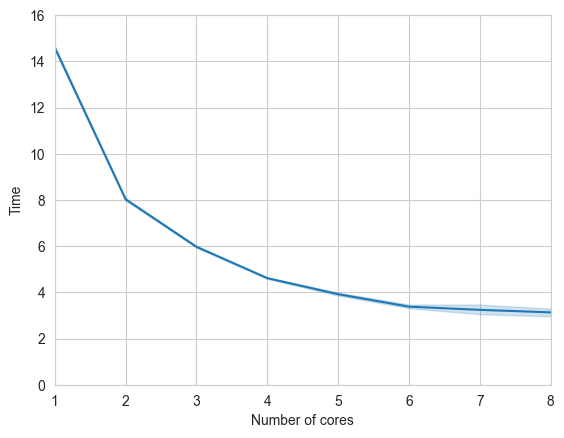

In [10]:
seaborn.set_style("whitegrid")

fig, ax = plt.subplots()

seaborn.lineplot(ax=ax, data=graph_df, x='Number of cores', y='Time')

ax.set_xlim(1, 8)
ax.set_xticks(range(1, 9))
ax.set_ylim(0, 16)
ax.set_yticks(range(0, 17, 2))

# average across 10 samples with 95% confidence interval